In [6]:
%matplotlib inline
from IPython.display import display
from itertools import chain
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
import pandas as pd
import numpy as np
import scipy as sc
from sklearn import preprocessing
from collections import Counter
from utils import *

import seaborn as sns
sns.set(style="white", color_codes=True)



import math
from geopy.geocoders import Nominatim
from mpl_toolkits.basemap import Basemap

In [ ]:
def getFreq(df):
    freq = Counter(df['Agencia_ID'])
    df1 = pd.DataFrame(list(freq.keys()), columns=['Agencia_ID'])
    df2 = pd.DataFrame(list(freq.values()), columns=['count'])
    freq_df = pd.concat([df1, df2], axis=1)
    return freq_df

In [37]:
df = pd.read_csv('../small_data/train.csv', usecols=['Agencia_ID'])
dfl = pd.read_csv('../data/town_state.csv')

In [47]:
freq_df = getFreq(df)
df_res = pd.merge(freq_df, dfl, how='left', on='Agencia_ID')
df_res.head()

,Agencia_ID,count,Town,State
0,2054,36,2174 SAN MIGUEL DE ALLENDE,GUANAJUATO
1,2055,67,2055 Pinotepa,PUEBLA
2,2057,48,2057 PUEBLA SUR MARINELA,PUEBLA
3,2059,6,2059 QUERETARO BALVANERA,QUERETARO
4,2060,50,2301 CUBILETE,GUANAJUATO


In [51]:
def getSpatialFeatures(df):
    geolocator = Nominatim()
    towns = list(df['Town'])
    print len(towns)
    locs = []
    for town in towns:
        #print (town)
        loc = geolocator.geocode(str(town))
        if loc is not None:
            locs.append(loc.raw)
        else:
            print (town, 'fail')
            locs.append({})
    df_loc = pd.DataFrame(locs)
    return df_loc
df_loc = getSpatialFeatures(df_res)
df_loc

440
('2057 PUEBLA SUR MARINELA', 'fail')
('2158 CUERNAVACA CIVAC', 'fail')
('2296 IRAPUATO SAN MIGUELITO', 'fail')
('2080 TEXCOCO WONDER', 'fail')
('2315 SAN LUIS POTOSI MARINELA', 'fail')
('2087 AG. TIZAYUCA', 'fail')
('2381 CANCUN_BM', 'fail')
('2386 COATZACOALCOS MLA.', 'fail')
('2379 ARRIAGA_BM', 'fail')
('2381 CANCUN_BM', 'fail')
('2386 COATZACOALCOS MLA.', 'fail')
('2381 CANCUN_BM', 'fail')
('2083 AZCAPOTZALCO II MARINELA', 'fail')
('2386 COATZACOALCOS MLA.', 'fail')
('2381 CANCUN_BM', 'fail')
('2168 MORELIA ABASTOS', 'fail')
('2189 ACAPULCO SAN ISIDRO', 'fail')
('2647 BLM_AG. CAMPESINOS AUTOSERVICI', 'fail')
('2190 BI_SAN FRANCISCO DEL RINCON', 'fail')
('2048 AG. IXTAPALUCA 1', 'fail')
('2027 AG. VALLEJO', 'fail')
('2092 AG. SANTA CLARA AUTOSERVICIOS', 'fail')
('2001 AG. ATIZAPAN', 'fail')
('2013 AG. MEGA NAUCALPAN', 'fail')
('2002 AG. AZCAPOTZALCO', 'fail')
('2008 AG. LAGO FILT', 'fail')
('2002 AG. AZCAPOTZALCO', 'fail')
('2004 AG. CUAUTITLAN', 'fail')
('2008 AG. LAGO FILT', 'f

,boundingbox,class,display_name,icon,importance,lat,licence,lon,osm_id,osm_type,place_id,type
0,"[20.8883248, 20.934945, -100.7730585, -100.713...",place,"San Miguel de Allende, Guanajuato, Estados Uni...",https://nominatim.openstreetmap.org/images/map...,0.810085,20.9139025,"Data © OpenStreetMap contributors, ODbL 1.0. h...",-100.7440119,2372616,relation,145025966,town
1,"[31.7195792, 31.7203823, -106.4950864, -106.49...",highway,"Pinotepa, Anexas, Ciudad Juárez, Juárez, Chihu...",NaN,0.210000,31.7201492,"Data © OpenStreetMap contributors, ODbL 1.0. h...",-106.4942482,81604186,way,79559432,residential
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[20.5287963, 20.5288963, -100.4641238, -100.46...",place,"Lomas de Balvanera, El Pueblito, Santiago de Q...",NaN,0.300000,20.5288463,"Data © OpenStreetMap contributors, ODbL 1.0. h...",-100.4640738,3819879909,node,51810965,neighbourhood
4,"[25.4601923, 25.5001923, -108.5401202, -108.50...",place,"El Cubilete, Guasave, Sinaloa, Estados Unidos ...",https://nominatim.openstreetmap.org/images/map...,0.375000,25.4801923,"Data © OpenStreetMap contributors, ODbL 1.0. h...",-108.5201202,3750670156,node,48690503,village
5,"[-33.5767415, -33.5467415, -70.7058026, -70.67...",aeroway,"Base Aérea El Bosque (SCBQ), Desvio Ochagavia,...",https://nominatim.openstreetmap.org/images/map...,0.001000,-33.5617415,"Data © OpenStreetMap contributors, ODbL 1.0. h...",-70.6908026,625115216,node,5898127,aerodrome
6,"[25.6574885, 25.6582507, -100.2006671, -100.20...",highway,"Costera, Acapulco, Guadalupe, Nuevo León, 6718...",NaN,0.300000,25.6574885,"Data © OpenStreetMap contributors, ODbL 1.0. h...",-100.2006671,157749303,way,95139279,residential
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"[20.4959546, 20.5546471, -100.8502498, -100.80...",highway,"Eje NorPoniente / Avenida Mexico Japon, Celaya...",NaN,0.300000,20.5293429,"Data © OpenStreetMap contributors, ODbL 1.0. h...",-100.8481582,171412251,way,99839540,primary
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
def prepareResults(df_res, df_loc):
    df_res = pd.concat([df_res, df_loc], axis=1)
    #scale the column to the range from 8 to 88
    df_res['count'] -= df_res['count'].min()
    df_res['count'] /= df_res['count'].max()
    df_res['count'] = df_res['count']*80+8
    df_res['count'] = df_res['count'].astype(int)
    #drop rows with no location information
    df_res = df_res.dropna()
    #lat and lon to float format
    df_res['lat'] = df_res['lat'].astype(float)
    df_res['lon'] = df_res['lon'].astype(float)
    return df_res
df_res = prepareResults(df_res, df_loc)
df_res

,Agencia_ID,count,Town,State,boundingbox,class,display_name,icon,importance,lat,licence,lon,osm_id,osm_type,place_id,type
0,2054,32,2174 SAN MIGUEL DE ALLENDE,GUANAJUATO,"[20.8883248, 20.934945, -100.7730585, -100.713...",place,"San Miguel de Allende, Guanajuato, Estados Uni...",https://nominatim.openstreetmap.org/images/map...,0.810085,20.913902,"Data © OpenStreetMap contributors, ODbL 1.0. h...",-100.744012,2372616,relation,145025966,town
4,2060,42,2301 CUBILETE,GUANAJUATO,"[25.4601923, 25.5001923, -108.5401202, -108.50...",place,"El Cubilete, Guasave, Sinaloa, Estados Unidos ...",https://nominatim.openstreetmap.org/images/map...,0.375000,25.480192,"Data © OpenStreetMap contributors, ODbL 1.0. h...",-108.520120,3750670156,node,48690503,village
5,2061,12,2175 TOLUCA AEROPUERTO,ESTADO DE MÉXICO,"[-33.5767415, -33.5467415, -70.7058026, -70.67...",aeroway,"Base Aérea El Bosque (SCBQ), Desvio Ochagavia,...",https://nominatim.openstreetmap.org/images/map...,0.001000,-33.561741,"Data © OpenStreetMap contributors, ODbL 1.0. h...",-70.690803,625115216,node,5898127,aerodrome
10,2072,29,2186 LAGOS DE MORENO,JALISCO,"[21.3150172, 21.3950172, -101.9704644, -101.89...",place,"Lagos de Moreno, Jalisco, 47400, Estados Unido...",https://nominatim.openstreetmap.org/images/map...,0.647828,21.355017,"Data © OpenStreetMap contributors, ODbL 1.0. h...",-101.930464,296372203,node,944636,town
12,2074,10,2044 CUERNAVACA BUENAVISTA,MORELOS,"[18.437778, 18.477778, -99.4319439, -99.3919439]",place,"Buenavista de Cuéllar, Guerrero, Estados Unido...",https://nominatim.openstreetmap.org/images/map...,0.375000,18.457778,"Data © OpenStreetMap contributors, ODbL 1.0. h...",-99.411944,849912890,node,7372773,village
21,2092,8,2186 LAGOS DE MORENO,JALISCO,"[21.3150172, 21.3950172, -101.9704644, -101.89...",place,"Lagos de Moreno, Jalisco, 47400, Estados Unido...",https://nominatim.openstreetmap.org/images/map...,0.647828,21.355017,"Data © OpenStreetMap contributors, ODbL 1.0. h...",-101.930464,296372203,node,944636,town
22,2095,9,2175 TOLUCA AEROPUERTO,ESTADO DE MÉXICO,"[-33.5767415, -33.5467415, -70.7058026, -70.67...",aeroway,"Base Aérea El Bosque (SCBQ), Desvio Ochagavia,...",https://nominatim.openstreetmap.org/images/map...,0.001000,-33.561741,"Data © OpenStreetMap contributors, ODbL 1.0. h...",-70.690803,625115216,node,5898127,aerodrome
23,2096,8,2301 CUBILETE,GUANAJUATO,"[25.4601923, 25.5001923, -108.5401202, -108.50...",place,"El Cubilete, Guasave, Sinaloa, Estados Unidos ...",https://nominatim.openstreetmap.org/images/map...,0.375000,25.480192,"Data © OpenStreetMap contributors, ODbL 1.0. h...",-108.520120,3750670156,node,48690503,village
30,2215,31,2392 MERIDA NORTE,YUCATÁN,"[47.2227704, 47.2627704, -100.9493071, -100.90...",place,"Merida, McLean County, North Dakota, United St...",https://nominatim.openstreetmap.org/images/map...,0.375000,47.242770,"Data © OpenStreetMap contributors, ODbL 1.0. h...",-100.929307,151617193,node,375754,hamlet
34,2220,24,2395 PLAYA DEL CARMEN,QUINTANA ROO,"[20.4682229, 20.7882229, -87.2356577, -86.9156...",place,"Playa del Carmen, Solidaridad, Quintana Roo, E...",https://nominatim.openstreetmap.org/images/map...,0.663258,20.628223,"Data © OpenStreetMap contributors, ODbL 1.0. h...",-87.075658,279948657,node,832397,city


83


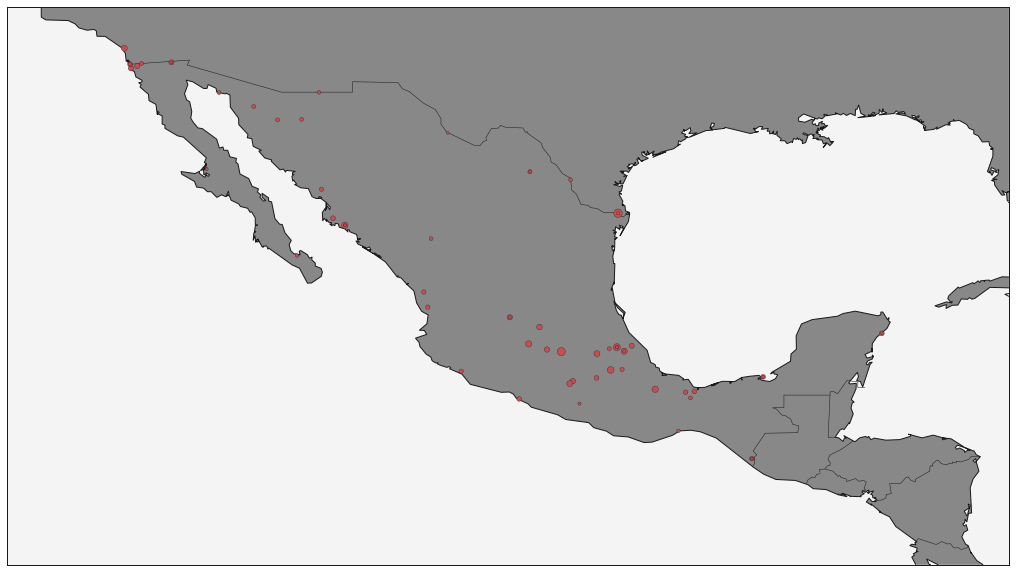

In [71]:
#http://introtopython.org/visualization_earthquakes.html

def drawMap(df):
   #from http://chrisalbon.com/python/matplotlib_plot_points_on_map.html
   fig = plt.figure(figsize=(20,10))
   m = Basemap(projection='gall', 
              # with low resolution,
              resolution = 'l', 
              # And threshold 100000
              area_thresh = 100000.0,
              llcrnrlon=-122, llcrnrlat=10.0,
              urcrnrlon= -82.0, urcrnrlat=35.0,
              # Centered at 0,0 (i.e null island)
              lat_0=23.0, lon_0=-102)

   # Draw the coastlines on the map
   m.drawcoastlines()
   # Draw country borders on the map
   m.drawcountries()
   # Fill the land with grey
   m.fillcontinents(color = '#888888')
   # Draw the map boundaries
   m.drawmapboundary(fill_color='#f4f4f4')
   x,y = m(df['lon'].values, df['lat'].values)
   z = df['count'].values
   print len(z)
   # Plot them using round markers of size 6
   #m.plot(x, y, 'ro', markersize=3)
   m.scatter(x, y, s=z, c='r', marker='o', zorder=2)
   # Show the map
   plt.show()
drawMap(df_res)

some error mapping the locations